In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [5]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['label','message']

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.duplicated().sum()

403

In [12]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1}) 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)


balanced_df = pd.DataFrame({
    'label': y_resampled.map({0: 'ham', 1: 'spam'}),
    'message': X_resampled.flatten()
})


print("Class distribution after balancing:")
print(balanced_df['label'].value_counts())

Class distribution after balancing:
label
ham     4516
spam    4516
Name: count, dtype: int64


In [16]:
balanced_df['Spam'] = balanced_df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [17]:
%matplotlib inline

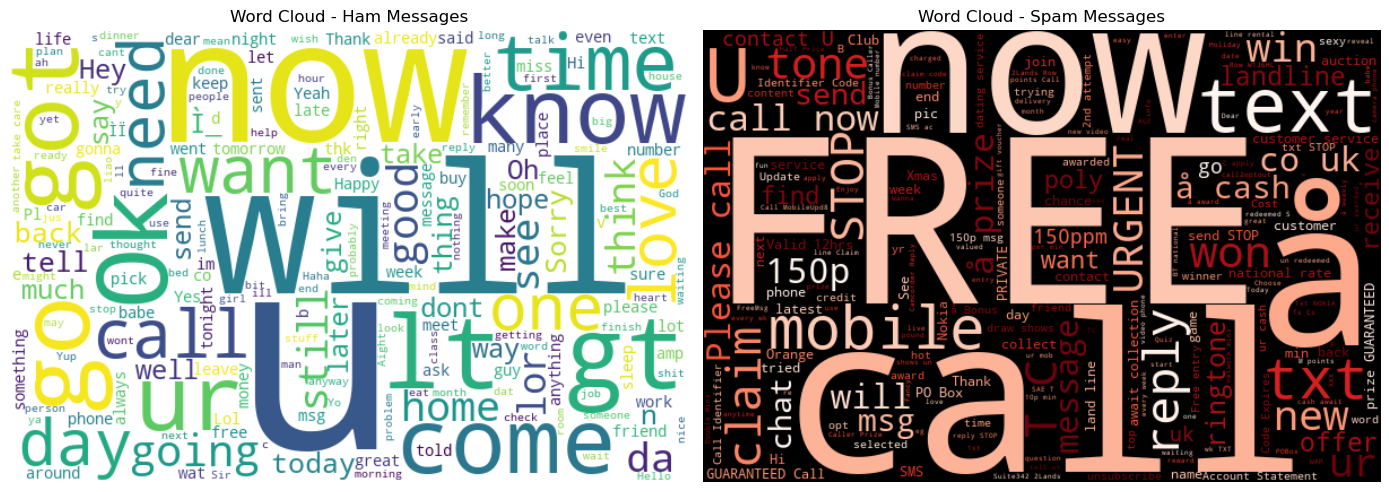

In [18]:
from wordcloud import WordCloud

ham_text = " ".join(df[df['label'] == 'ham']['message'])
spam_text = " ".join(df[df['label'] == 'spam']['message'])

ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
spam_wc = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_text)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ham Messages')

plt.subplot(1, 2, 2)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Spam Messages')

plt.tight_layout()
plt.show() 

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [20]:
balanced_df['message'] = balanced_df['message'].str.lower()

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
balanced_df['tokens'] = balanced_df['message'].apply(lambda x:word_tokenize(str(x)))

In [23]:
balanced_df['tokens'] = balanced_df['tokens'].apply(lambda x :[word for word in x if word not in stop_words])

In [24]:
lemmatizer = WordNetLemmatizer()
balanced_df['tokens'] = balanced_df['tokens'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
balanced_df['message'] = balanced_df['tokens'].apply(lambda x:''.join(x))

In [26]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(balanced_df['message'])
y = balanced_df['Spam']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [30]:
y_pred = model.predict(X_test)

In [31]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9933591588267847


In [32]:
print("Report: ",classification_report(y_test,y_pred))

Report:                precision    recall  f1-score   support

           0       1.00      0.99      0.99       884
           1       0.99      1.00      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807

